In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\priyan\appdata\local\programs\python\python312\lib\site-packages (2.2.0)



In [2]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning,message="use_inf_as_na option is deprecated and will be removed in a future version.")

import pandas as pd
df=pd.read_csv("C:/Users/PRIYAN/Downloads/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##EDA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df["SepalLengthCm"].nunique()

35

In [7]:
df["SepalWidthCm"].nunique()

23

In [8]:
df["PetalLengthCm"].nunique()

43

In [9]:
df["PetalWidthCm"].nunique()

22

In [10]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [11]:
df['Id']=df['Id'].astype('int')
df['SepalLengthCm']=df['SepalLengthCm'].astype('float')
df['SepalWidthCm']=df['SepalWidthCm'].astype('float')
df['PetalLengthCm']=df['PetalLengthCm'].astype('float')
df['PetalWidthCm']=df['PetalWidthCm'].astype('float')
df['Species']=df['Species'].astype('category')


## Data visualization

In [12]:
#importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns


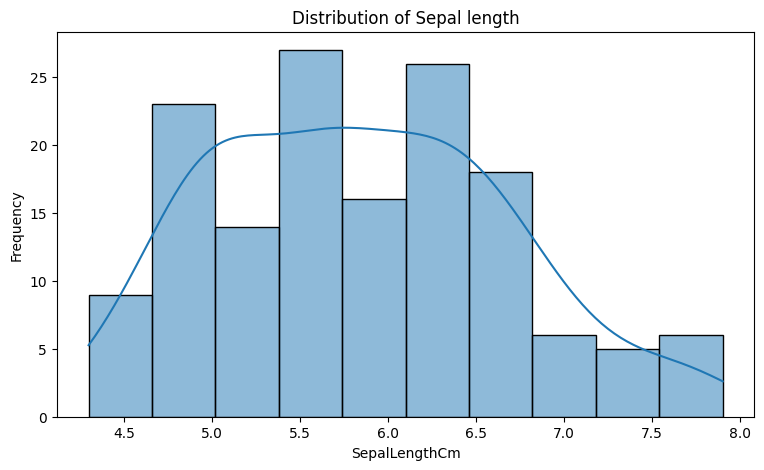

In [13]:
#histogram for sepallengthcm
plt.figure(figsize=(9,5))
sns.histplot(df['SepalLengthCm'], kde=True, bins=10)
plt.title('Distribution of Sepal length')
plt.xlabel('SepalLengthCm')
plt.ylabel('Frequency')
plt.show()

In [14]:
plt.savefig('sepal_length.png',dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

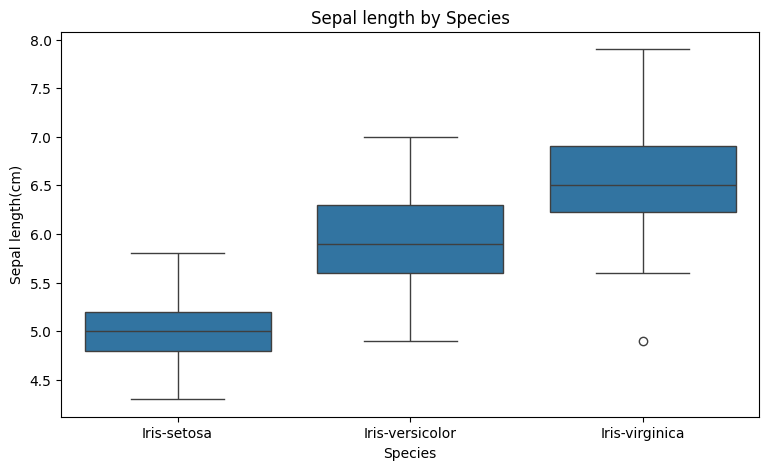

In [15]:
#box plot for sepallengthcm by species
plt.figure(figsize=(9,5))
sns.boxplot(x='Species',y='SepalLengthCm',data=df)
plt.title('Sepal length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal length(cm)')
plt.show()

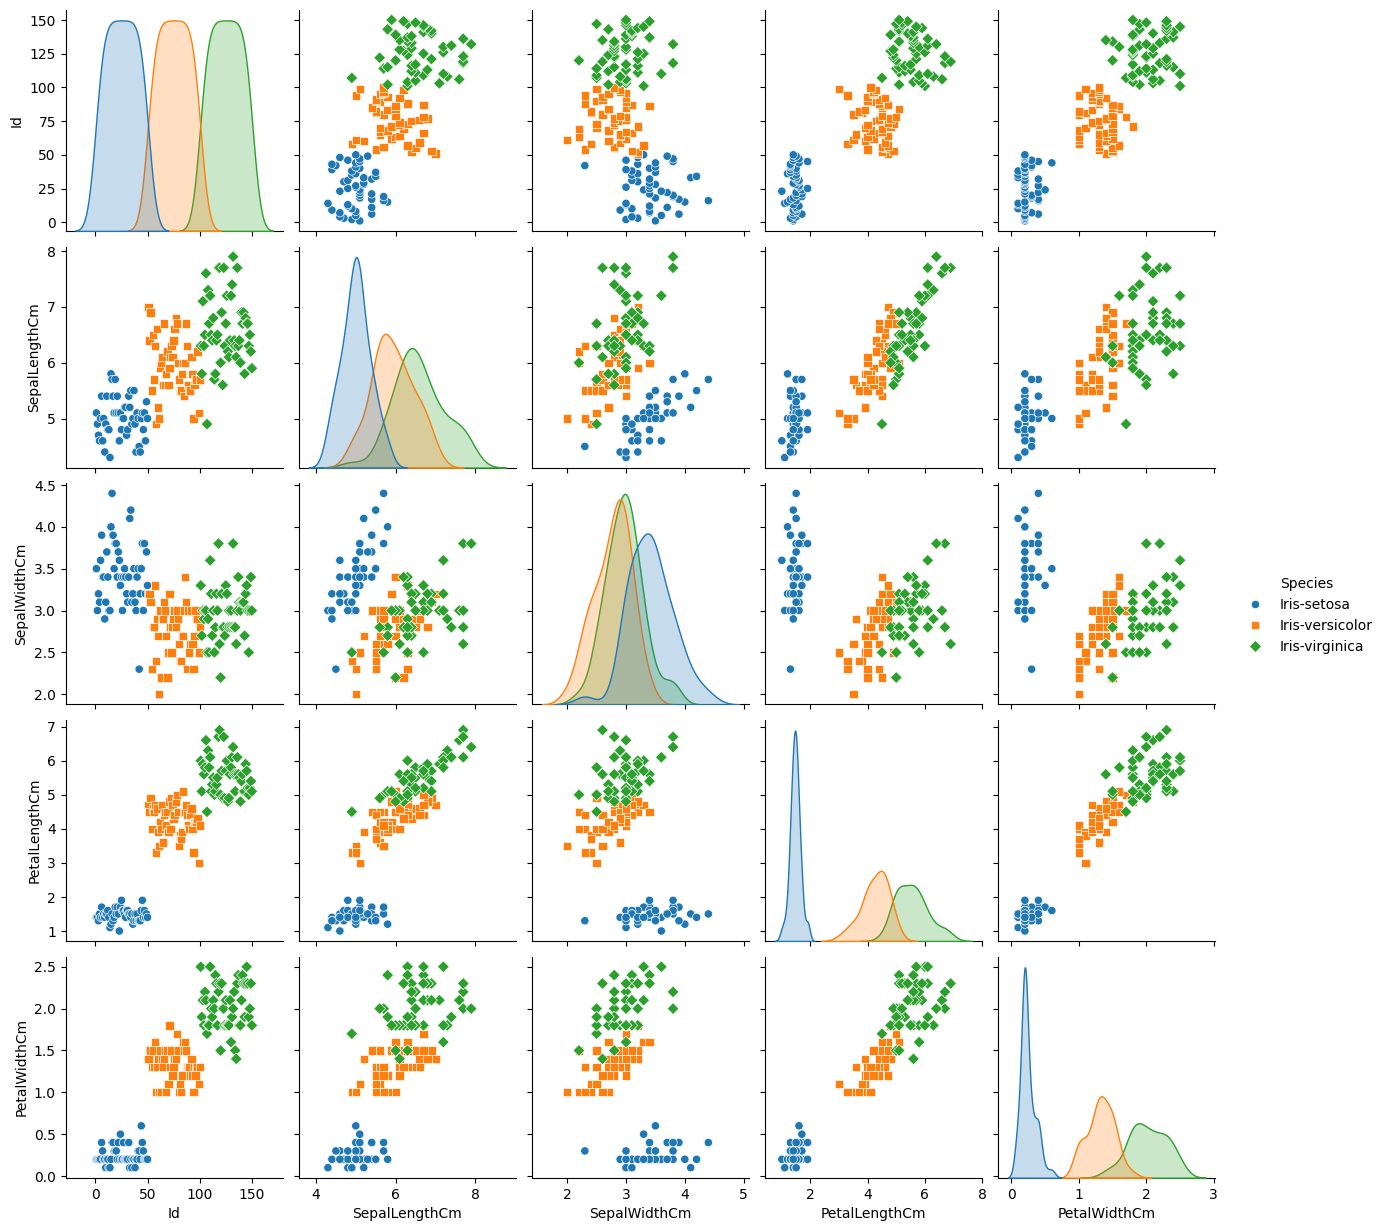

In [16]:
#pair plot for all features 
sns.pairplot(df,hue='Species',markers=["o","s","D"])
plt.show()

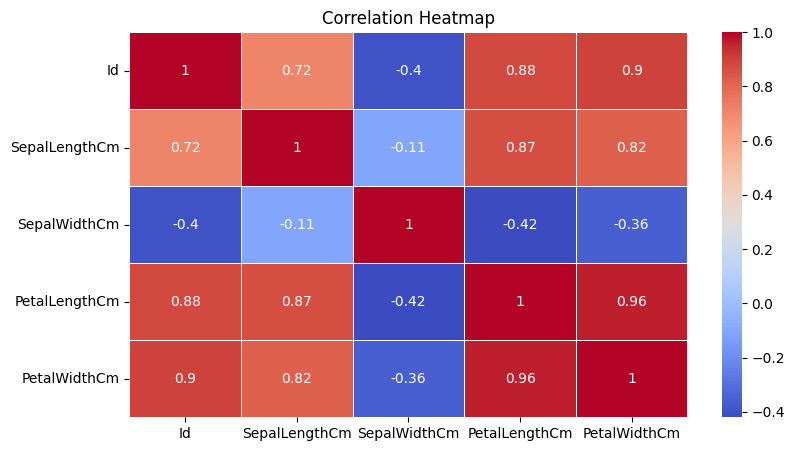

In [17]:
# heatmap for correlation between features
#converting infinite values to nan
import numpy as np
df.replace([np.inf,-np.inf],np.nan,inplace=True)

#drop rows with NaN values or handle them as needed
df.dropna(inplace=True)


#exclude non numeric columns for correlation calculation 
numeric_df=df.select_dtypes(include=[np.number])

#heatmap for correlation between features
plt.figure(figsize=(9,5))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm',linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()


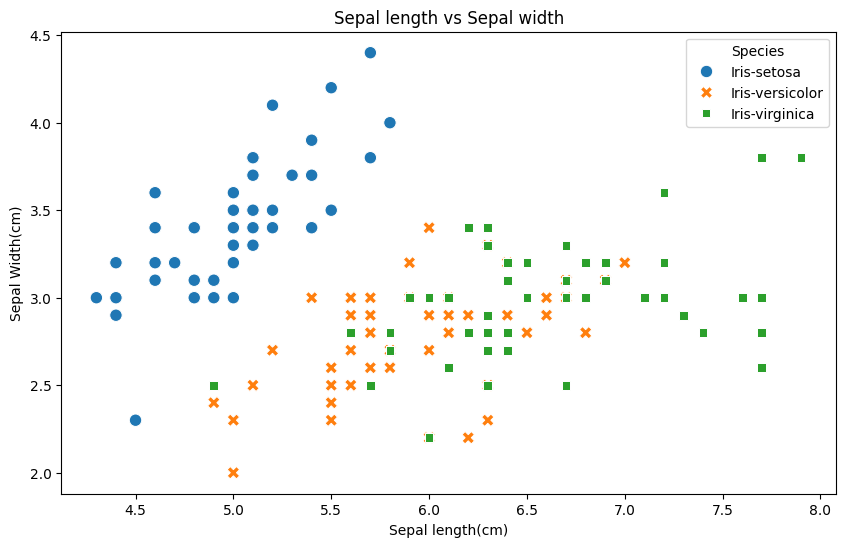

In [18]:
#scatter plot for SepalLengthcm vs Sepalwidthcm colored by Species
plt.figure(figsize=(10,6))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',style='Species',s=80,data=df)
plt.title('Sepal length vs Sepal width')
plt.xlabel('Sepal length(cm)')
plt.ylabel('Sepal Width(cm)') 
plt.legend(title='Species')
plt.show() 

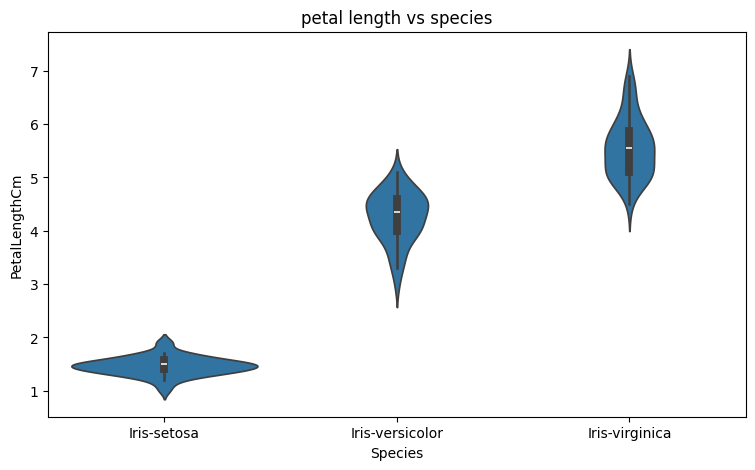

In [19]:
#violoin plot for petal length vs species
plt.figure(figsize=(9,5))
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.title('petal length vs species')
plt.xlabel('Species')
plt.ylabel('PetalLengthCm')
#plt.legend(title='Species')
plt.show()

## splitting the data into training and testing 


In [20]:
n_df=df.drop(columns=['Species'])

In [21]:
from sklearn.model_selection import train_test_split
x=n_df
y=df["Species"]

#splitting the data into training and testing 
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=42)


In [22]:
from sklearn.preprocessing import StandardScaler 
#standardising feature with standard scalar
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [23]:
#importing all the nessecary libraries
from sklearn import svm
from sklearn import metrics

#from sklearn.cross_validation import train_test_split

#fitting svm algorithm in the model for prediction 
model = svm.SVC() 
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print("accuracy of the svm is :",metrics.accuracy_score(prediction,y_test))



accuracy of the svm is : 1.0


In [24]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print("accuracy score of the logistic regression is :",metrics.accuracy_score(prediction,y_test,))


accuracy score of the logistic regression is : 1.0


In [25]:
#Decisiontree 
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
prediction=DT.predict(x_test)
print("accuracy score of the decision tree classifier is :",metrics.accuracy_score(prediction,y_test))

accuracy score of the decision tree classifier is : 1.0


In [26]:
#knn
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print("Accuracy score of the knn is:",metrics.accuracy_score(prediction,y_test))
#print("Accuracy score of the knn is:",metrics.accuracy_score(prediction,y_train))

Accuracy score of the knn is: 1.0


In [27]:
y_pred=model.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

#### Evaluation metrices

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 100.00%


In [29]:
print('confusion_matrix:')
print(confusion_matrix(y_test,y_pred))

confusion_matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


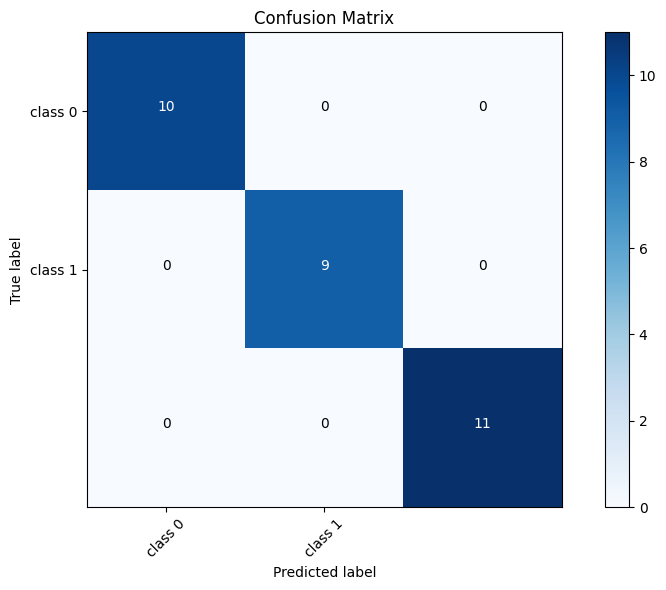

In [33]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
cn = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(9, 6))
plt.imshow(cn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Adding ticks and labels
classes = ['class 0', 'class 1']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Adding annotations
thresh = cn.max() / 2
for i, j in itertools.product(range(cn.shape[0]), range(cn.shape[1])):
    plt.text(j, i, format(cn[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cn[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()
